#TALLER

Laura Hernández

Daniel Mateo Bernal

María Cristina Vidales

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as seaborn

In [8]:
df = pd.read_csv('datos.csv')

In [9]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


#Exploración inicial

In [10]:
df.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
5,14115,5,5,29,27,3,3,1,2,0,143000,0
6,10084,8,5,18,17,4,3,3,2,0,307000,0
7,10382,7,6,49,49,3,3,3,2,0,200000,0
8,6120,7,5,91,72,3,3,2,2,0,129900,1
9,7420,5,6,83,72,3,3,2,1,0,118000,1


###Conclusión: Entre las 10 primeras, solo dos están cerca a una arteria, ninguna tiene piscina, solo una tiene una habitación y la más vieja tiene 107 años de construcción.

In [11]:
df.tail(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
1450,9000,5,5,48,48,3,3,4,0,0,136000,0
1451,9262,8,5,14,13,4,3,3,3,0,287090,0
1452,3675,5,5,17,17,3,3,2,2,0,145000,0
1453,17217,5,5,16,16,3,3,3,0,0,84500,0
1454,7500,7,5,18,17,4,3,2,2,0,185000,0
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0
1459,9937,5,6,57,57,4,3,3,1,0,147500,0


###Conclusión: Entre las 10 últimas, ninguna está cerca a una arteria, ninguna tiene piscina, todas tienen más de una habitación y la más vieja tiene 81 años de construcción.

In [12]:
len(df.columns)

12

In [13]:
print("Number of Rows:", len(df))

Number of Rows: 1460


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   OverallCond   1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   YearRemodAdd  1460 non-null   int64
 5   ExterQual     1460 non-null   int64
 6   ExterCond     1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   PoolArea      1460 non-null   int64
 10  SalePrice     1460 non-null   int64
 11  Artery        1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


###Conclusión: Todos los tipos de datos son números enteros y no tienen datos nulos.

In [15]:
df.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,50.732192,37.134247,3.39589,3.083562,2.866438,1.767123,2.758904,180921.195890,0.032877
std,9981.264932,1.382997,1.112799,30.202904,20.645407,0.57428,0.351054,0.815778,0.747315,40.177307,79442.502883,0.178375
min,1300.000000,1.000000,1.000000,12.000000,12.000000,2.00000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,7553.500000,5.000000,5.000000,22.000000,18.000000,3.00000,3.000000,2.000000,1.000000,0.000000,129975.000000,0.000000
50%,9478.500000,6.000000,5.000000,49.000000,28.000000,3.00000,3.000000,3.000000,2.000000,0.000000,163000.000000,0.000000
75%,11601.500000,7.000000,6.000000,68.000000,55.000000,4.00000,3.000000,3.000000,2.000000,0.000000,214000.000000,0.000000
max,215245.000000,10.000000,9.000000,150.000000,72.000000,5.00000,5.000000,8.000000,4.000000,738.000000,755000.000000,1.000000


In [16]:
df.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
ExterCond       0
BedroomAbvGr    0
GarageCars      0
PoolArea        0
SalePrice       0
Artery          0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.drop_duplicates()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
0,8450,7,5,19,19,4,3,3,2,0,208500,0
1,9600,6,8,46,46,3,3,3,2,0,181500,0
2,11250,7,5,21,20,4,3,3,2,0,223500,0
3,9550,7,5,107,52,3,3,3,3,0,140000,0
4,14260,8,5,22,22,4,3,4,3,0,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,23,22,3,3,3,2,0,175000,0
1456,13175,6,6,44,34,3,3,3,2,0,210000,0
1457,9042,7,9,81,16,5,4,4,1,0,266500,0
1458,9717,5,6,72,26,3,3,2,1,0,142125,0


#Visualización de datos
###Visualización univariada

(array([1.423e+03, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  1300. ,  22694.5,  44089. ,  65483.5,  86878. , 108272.5,
        129667. , 151061.5, 172456. , 193850.5, 215245. ]),
 <a list of 10 Patch objects>)

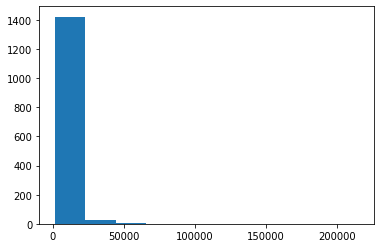

In [20]:
from pandas.io.formats.style import plt
plt.hist(df["LotArea"])

Conclusión: la mayoría de viviendas tienen un área entre 0 y 50000.

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

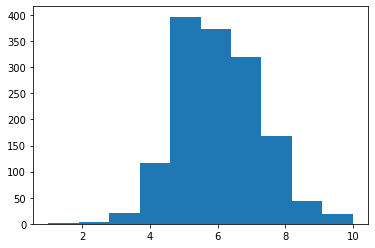

In [21]:
from pandas.io.formats.style import plt
plt.hist(df["OverallQual"])

Conclusión: La calidad general de las viviendas va aumentando hasta llegar al 5, a partir de ahí, la calidad general del inmueble comienza a disminuir.  


(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

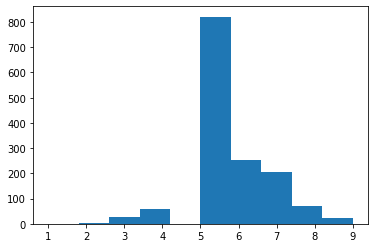

In [22]:
from pandas.io.formats.style import plt
plt.hist(df["OverallCond"])

Conclusión: La cantidad de viviendas aumenta en menor medida aproximadamente entre 2 y 4 de la condición general del inmueble, entre 4 y 5 no presenta ninguna condición general de la vivienda. La mayoría de las viviendas tienen una condición general entre 5 y 6, y desde este intervalo la cantidad de viviendas empieza a disminuir respecto a la condición general del inmueble. 

(array([452., 139., 223., 261., 113.,  98., 122.,  37.,   6.,   9.]),
 array([ 12. ,  25.8,  39.6,  53.4,  67.2,  81. ,  94.8, 108.6, 122.4,
        136.2, 150. ]),
 <a list of 10 Patch objects>)

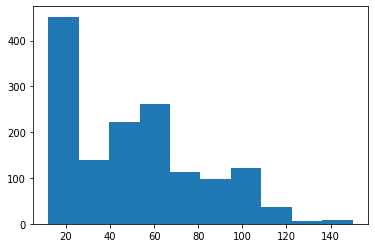

In [23]:
from pandas.io.formats.style import plt
plt.hist(df["YearBuilt"])

Conclusión: La mayoría de las casas tienen 20 años de construidas.
 

(array([315., 267., 169.,  76.,  41., 103.,  96.,  87.,  76., 230.]),
 array([12., 18., 24., 30., 36., 42., 48., 54., 60., 66., 72.]),
 <a list of 10 Patch objects>)

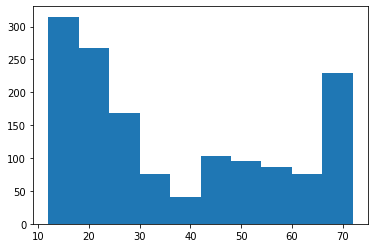

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["YearRemodAdd"])

Conclusión: Aproximadamente la mayoría de las viviendas tienen entre 10 y 20 años de remodelación y la menor cantidad de viviendas tienen 40 años de remodelación. 

(array([ 14.,   0.,   0., 906.,   0.,   0., 488.,   0.,   0.,  52.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

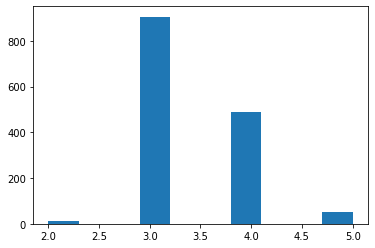

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["ExterQual"])

Conclusión: La mayoría de las viviendad tienen una calidad de la fachada de 3.

(array([1.000e+00, 0.000e+00, 2.800e+01, 0.000e+00, 0.000e+00, 1.282e+03,
        0.000e+00, 1.460e+02, 0.000e+00, 3.000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

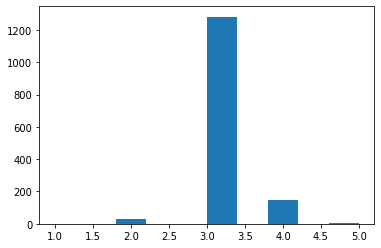

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["ExterCond"])

Conclusión: La mayoría de las viviendas tienen una condición de fachada entre 3 y 3,5.

(array([  6.,  50., 358., 804.,   0., 213.,  21.,   7.,   0.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

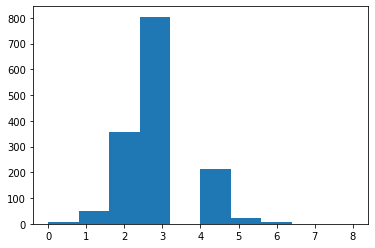

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["BedroomAbvGr"])

Conclusión: La cantidad de viviendas va aumentando entre 0 y 3 cantidad de habitaciones, ninguna vivienda tiene entre 3 y 4 cantidad de habitaciones, y desde 4 hasta aproximadamente 6 habitaciones, la cantidad de viviendas comienza a disminuir.  

(array([ 81.,   0., 369.,   0.,   0., 824.,   0., 181.,   0.,   5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

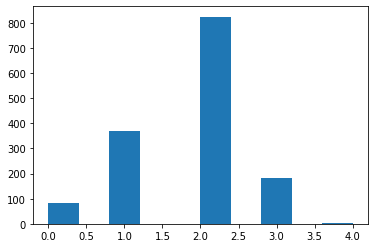

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["GarageCars"])

Conclusión: La mayoría de viviendas tienen entre 2 y 2,5 garajes.

(array([1.453e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  73.8, 147.6, 221.4, 295.2, 369. , 442.8, 516.6, 590.4,
        664.2, 738. ]),
 <a list of 10 Patch objects>)

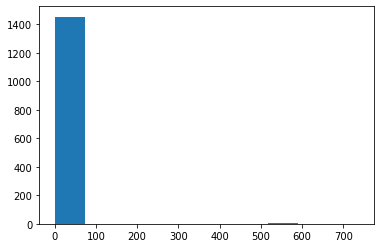

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["PoolArea"])

Conclusión: Ninguna casa tiene piscina. 

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

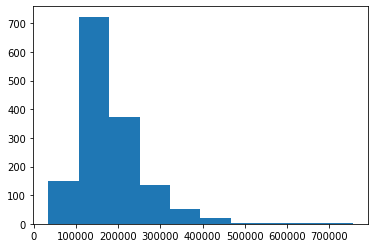

In [ ]:
from pandas.io.formats.style import plt
plt.hist(df["SalePrice"])

Conclusión: La mayoría de las viviendas tienen un precio de entre 100000 y 200000, a partir de este valor, a medida que aumenta el precio la cantidad de viviendas disminuye.

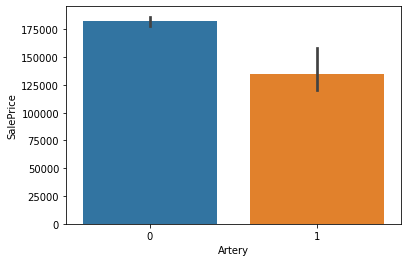

In [ ]:
sns.barplot(data=df, x='Artery', y='SalePrice')

In [ ]:
import seaborn as sns 

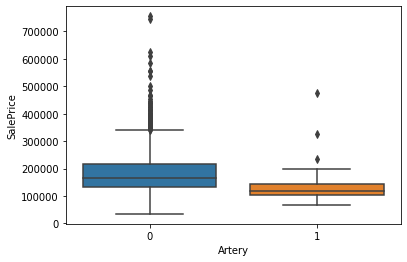

In [ ]:
sns.boxplot(data=df, x='Artery', y='SalePrice')

Conclusión: Podemos estimar que en efecto, vivir cerca a una arteria reduce el precio de la vivienda. Mientras que, vivir lejos a una arteria no aumenta el precio. 

A su vez, podemos deducir que, la mediana de vivir lejos de una arteria, es mayor que la de estar cerca a una. 

## Visualización bivariada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


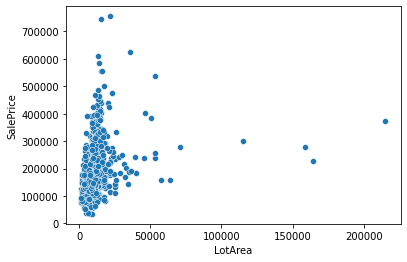

In [ ]:
sns.scatterplot(df['LotArea'],df['SalePrice'])

Conclusión: El precio se concentra mayormente en las viviendas que tienen un área de entre 0 y 50000. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


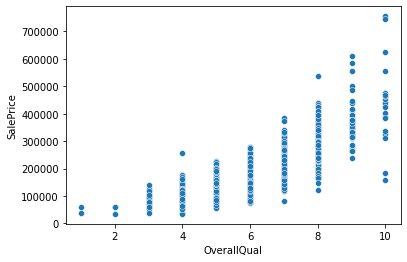

In [ ]:
sns.scatterplot(df['OverallQual'],df['SalePrice'])

Conclusión: a medida que aumenta calidad general del inmueble, aumenta el precio. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


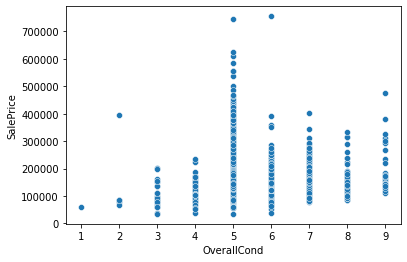

In [ ]:
sns.scatterplot(df['OverallCond'],df['SalePrice'])

Conclusión: Cuando la condición general del inmueble esta en 5, la vivienda presenta el precio mayor.   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


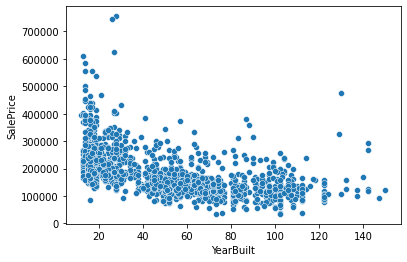

In [ ]:
sns.scatterplot(df['YearBuilt'],df['SalePrice'])

Conclusión: El precio disminuye en menor intensidad a medida que aumentan los años de construcción de la vivienda.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


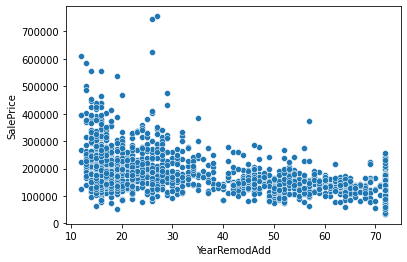

In [ ]:
sns.scatterplot(df['YearRemodAdd'],df['SalePrice'])

Conclusión: El precio disminuye en menor intensidad a medida que aumentan los años de remodelación de la vivienda.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


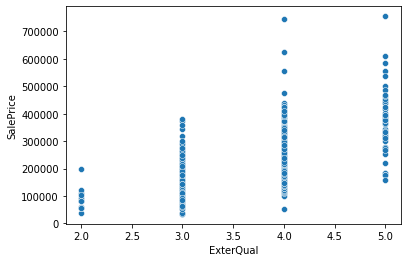

In [ ]:
sns.scatterplot(df['ExterQual'],df['SalePrice'])

Conclusión: a medida que aumenta calidad de la fachada, aumenta el precio.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


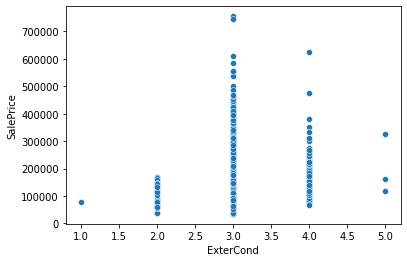

In [ ]:
sns.scatterplot(df['ExterCond'],df['SalePrice'])

Conclusión: Cuando la condición de la fachada del inmueble esta en 3, la vivienda presenta el precio mayor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


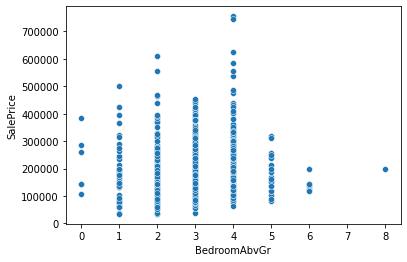

In [ ]:
sns.scatterplot(df['BedroomAbvGr'],df['SalePrice'])

Conclusión: Entre 0 y 2 habitaciones el precio va aumentando, el precio mayor de la vivienda se presenta cuando el inmueble tiene 4 habitaciones, y desde esa cantidad el precio empieza a disminuir. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


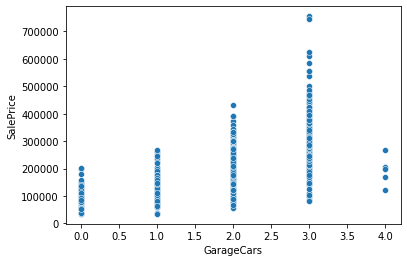

In [ ]:
sns.scatterplot(df['GarageCars'],df['SalePrice'])

Conclusión: El precio del inmueble aumenta entre 0 y 3 garajes, y disminuye cuando la vivienda tiene 4 garajes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


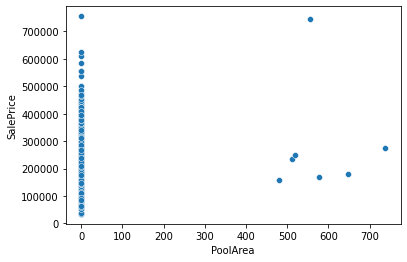

In [ ]:
sns.scatterplot(df['PoolArea'],df['SalePrice'])

Conclusión: Como ninguna casa tiene Piscina, esta variable no afecta el precio.

###Análisis de correlación

In [ ]:
df.corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
LotArea,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.055570,0.014732,0.119690,0.154871,0.077672,0.263843,-0.009526
OverallQual,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.726278,0.013953,0.101676,0.600671,0.065166,0.790982,-0.068812
OverallCond,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.138942,0.389163,0.012980,-0.185758,-0.001985,-0.077856,0.080743
YearBuilt,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.598160,0.103925,0.070651,-0.537850,-0.004950,-0.522897,0.233179
YearRemodAdd,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.587318,-0.074745,0.040581,-0.420622,-0.005829,-0.507101,0.164073
ExterQual,0.055570,0.726278,-0.138942,-0.598160,-0.587318,1.000000,0.009184,-0.018729,0.526390,0.034766,0.682639,-0.100382
ExterCond,0.014732,0.013953,0.389163,0.103925,-0.074745,0.009184,1.000000,0.015065,-0.009377,0.044387,0.018899,0.076499
BedroomAbvGr,0.119690,0.101676,0.012980,0.070651,0.040581,-0.018729,0.015065,1.000000,0.086106,0.070703,0.168213,0.049038
GarageCars,0.154871,0.600671,-0.185758,-0.537850,-0.420622,0.526390,-0.009377,0.086106,1.000000,0.020934,0.640409,-0.071068
PoolArea,0.077672,0.065166,-0.001985,-0.004950,-0.005829,0.034766,0.044387,0.070703,0.020934,1.000000,0.092404,0.036302


#Conclusión
## El precio tiene correlación positiva con área del inmueble, calidad de la fachada, condición de la fachada, número de garajes y área de la piscina; pero tiene una correlación positiva fuerte con la calidad general del inmueble.

## El precio tiene correlación negativa con la condición general del inmueble y correlación negativa fuerte con año de remodelación y año de construcción. 

In [ ]:
df.corr(method="spearman")

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BedroomAbvGr,GarageCars,PoolArea,SalePrice,Artery
LotArea,1.000000,0.233303,-0.046912,-0.103385,-0.075158,0.148995,0.032046,0.337788,0.340195,0.084460,0.456461,-0.024566
OverallQual,0.233303,1.000000,-0.177521,-0.647392,-0.557723,0.715988,-0.015870,0.121517,0.608756,0.056667,0.809829,-0.081717
OverallCond,-0.046912,-0.177521,1.000000,0.416964,0.041464,-0.228402,0.329091,-0.003713,-0.254763,-0.005605,-0.129325,0.079480
YearBuilt,-0.103385,-0.647392,0.416964,1.000000,0.684388,-0.678997,0.116672,0.035257,-0.601519,-0.008986,-0.652682,0.219426
YearRemodAdd,-0.075158,-0.557723,0.041464,0.684388,1.000000,-0.631327,-0.043496,0.054371,-0.456245,-0.002821,-0.571159,0.154949
ExterQual,0.148995,0.715988,-0.228402,-0.678997,-0.631327,1.000000,-0.007822,0.010209,0.542498,0.033574,0.684014,-0.107414
ExterCond,0.032046,-0.015870,0.329091,0.116672,-0.043496,-0.007822,1.000000,0.024243,-0.036854,0.041834,0.011682,0.071515
BedroomAbvGr,0.337788,0.121517,-0.003713,0.035257,0.054371,0.010209,0.024243,1.000000,0.118497,0.071734,0.234907,0.030117
GarageCars,0.340195,0.608756,-0.254763,-0.601519,-0.456245,0.542498,-0.036854,0.118497,1.000000,0.021783,0.690711,-0.081109
PoolArea,0.084460,0.056667,-0.005605,-0.008986,-0.002821,0.033574,0.041834,0.071734,0.021783,1.000000,0.058453,0.042658


#Conclusión
A pesar del cambio de método de Pearson a Spearman, se obtienen los mismos resultados:

El precio tiene correlación positiva con área del inmueble, calidad de la fachada, condición de la fachada, número de garajes y área de la piscina; pero tiene una correlación positiva fuerte con la calidad general del inmueble.

El precio tiene correlación negativa con la condición general del inmueble y correlación negativa fuerte con año de remodelación y año de construcción.

# Modelamiento

In [ ]:
y=df['SalePrice']
X= sm.add_constant(df[['Artery','OverallQual','YearBuilt','BedroomAbvGr','ExterQual','GarageCars']])
model= sm.OLS(y,X)
reg=model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     554.2
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:56:00   Log-Likelihood:                -17675.
No. Observations:                1460   AIC:                         3.536e+04
Df Residuals:                    1453   BIC:                         3.540e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.618e+05    1.1e+04    -14.765      0.000   -1.83e+05    -1.4e+05
Artery         -1.9e+04   6652.782     -2.856      0.004    -3.2e+04   -5948.545
OverallQual    2.86e+04   1335.249     21.419      0.000     2.6e+04    3.12e+04
YearBuilt       23.7926     52.631      0.452      0.651     -79.447     127.033
BedroomAbvGr  1.007e+04   1446.160      6.962      0.000    7231.180    1.29e+04
ExterQual     2.835e+04   3100.515      9.143      0.000    2.23e+04    3.44e+04
GarageCars    2.407e+04   2029.023     11.862      0.000    2.01e+04     2.8e+04
==============================================================================
Omnibus:                      731.579   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10409.443
Skew:                           1.978   Prob(JB):                         0.00
Kurtosis:                      15.468   Cond. No.                         577.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Conclusión
## La única variable significativa es el año de construcción, ya que, tiene P-valor es mayor a 0,05 y esta misma variable nos indica que el coeficiente estimado incrementa el precio de la vivienda en $23.7926

#Conclusiones generales
##El precio de una vivienda se ve afectado por diferentes variables, como la calidad general que tenga el inmueble o el estar cerca o lejos de una arteria.


